In [1]:
%run DFM_class.ipynb


In [17]:
X,Gamma,F,loading,f=generate_test_data(100,1000,prt=True)
X.shape

off_diagonal sum= 1.3416452521806157


(100, 1000)

In [41]:
#add outlier
S=np.zeros(X.shape)
for i in range(X.shape[0]):
    outlier=np.random.randn()*20
    col=np.random.randint(0,100)
    row=np.random.randint(0,1000)
    S[col,row]=outlier

In [26]:
from sklearn.metrics import mean_absolute_error
mae=[]
model=DFM(X,5,5)
#initialize parameter using pca
model.pca()
#map model to stacked form
model.to_state_space_rep()
#EM estimation, loglikylihood is returned and saved to ll.
ll=model.em(max_iter=1000)
y_true=F[:,model.lag-1:]
y_pred=model.stacked_factor[:5]
for i in range(5):
    if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
        y_pred[i]=-y_pred[i]
mae.append(mean_absolute_error(y_true.T, y_pred.T))

In [42]:
model=DFM(X+S,5,5)
#initialize parameter using pca
model.pca()
model.lag=3
#map model to stacked form
model.to_state_space_rep()
#EM estimation, loglikylihood is returned and saved to ll.

ll=model.em(max_iter=1000)
y_true=F[:,model.lag-1:]
y_pred=model.stacked_factor[:5]
for i in range(5):
    if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
        y_pred[i]=-y_pred[i]
mae.append(mean_absolute_error(y_true.T, y_pred.T))

In [35]:
y_true=F[:,:]
y_pred=model.pca_factor
for i in range(5):
    if r2_score(y_true[i], y_pred[i])<r2_score(y_true[i], -y_pred[i]):
        y_pred[i]=-y_pred[i]
mae.append(mean_absolute_error(y_true.T, y_pred.T))

In [43]:
mae

[0.18081783814096758,
 2.1951206030971178,
 2.1974212273945133,
 1.3254061281964509]

In [45]:
mae[-1]/mae[0]

7.3300629065322065

r2= 0.8793682253182752
r2= -0.8849371661378171
r2= -0.7195841120388928
r2= 0.003924877862733989
r2= -2.1185299077140116


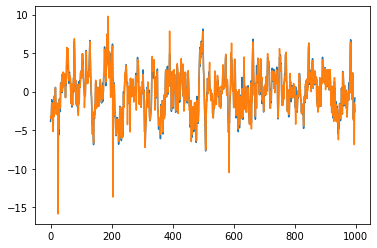

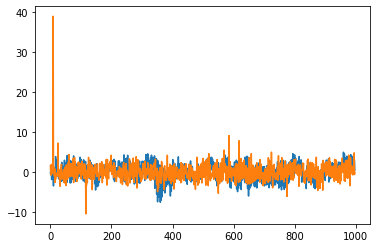

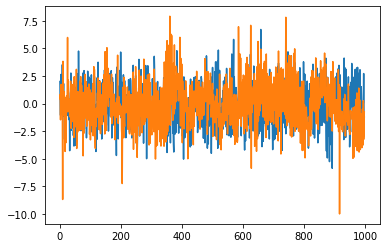

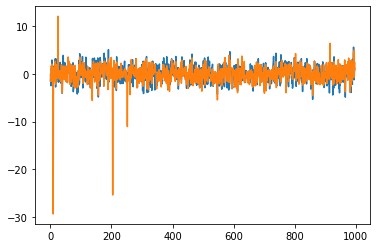

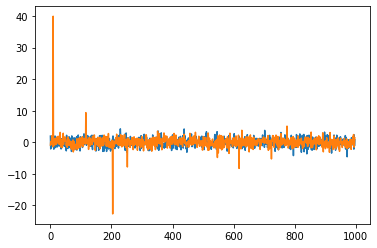

In [44]:
compare_factor_plot(y_true,y_pred)